In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
bac =  pd.read_csv("student_bac_path.csv")
algo =  pd.read_csv("result_clean.csv")
algo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 6 columns):
id_student      1762 non-null int64
algo_one        1762 non-null float64
algo_two        1762 non-null float64
current_year    1762 non-null int64
study_level     1762 non-null object
status          1762 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 82.7+ KB


In [47]:
# drop status level and current year from bac data set
algo = algo.drop(columns=['id_student','current_year', 'study_level', 'status'])
algo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 2 columns):
algo_one    1762 non-null float64
algo_two    1762 non-null float64
dtypes: float64(2)
memory usage: 27.7 KB


In [48]:
X = algo['algo_one']
Y = algo['algo_two']

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X = label.fit_transform(X).reshape(-1, 1)
Y = label.fit_transform(Y)


In [49]:
#split data into train and test data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size = 0.3 , random_state = 40)

In [50]:
#predict and train 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
pred = reg.predict(x_test)

In [51]:

print("slope ",reg.coef_)
print("intercept ",reg.intercept_)

slope  [0.74610545]
intercept  43.840816470980414


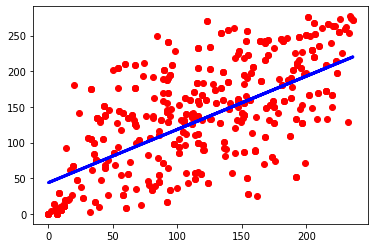

In [52]:
plt.scatter(x_test,y_test, color="red")
plt.plot(x_test,pred, color="blue", linewidth=3)
plt.show()